In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk

In [2]:
nltk.download('stopwords')
num_rows_to_read = 5000
news_dataset = pd.read_csv('C:/Users/manja/Project/fake-news/train.csv', nrows=num_rows_to_read)
news_dataset.dropna(inplace=True)

# Combine features
news_dataset['content'] = news_dataset['title'] + ' ' + news_dataset['text']
news_dataset['content']

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


0       House Dem Aide: We Didn’t Even See Comey’s Let...
1       FLYNN: Hillary Clinton, Big Woman on Campus - ...
2       Why the Truth Might Get You Fired Why the Trut...
3       15 Civilians Killed In Single US Airstrike Hav...
4       Iranian woman jailed for fictional unpublished...
                              ...                        
4995    Hillary Clinton and Bernie Sanders Meet as The...
4996    Dr. Duke & Andrew Anglin the True Voice of the...
4997    What It Was Like Onstage During the Oscars 201...
4998    For Whites Sensing Decline, Donald Trump Unlea...
4999    Tumult in Turkey: What We Know and Don’t Know ...
Name: content, Length: 4380, dtype: object

In [3]:
# Define English stopwords
english_stopwords = set(stopwords.words('english'))

def stemming(content, stopwords_set):
    port_stem = PorterStemmer()
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if word not in stopwords_set]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [4]:
# Apply stemming function to 'content' column in batches
batch_size = 1000  # Adjust batch size as needed
num_batches = (len(news_dataset) + batch_size - 1) // batch_size

for batch_idx in range(num_batches):
    start_idx = batch_idx * batch_size
    end_idx = min((batch_idx + 1) * batch_size, len(news_dataset))
    news_dataset.loc[start_idx:end_idx, 'content'] = news_dataset.loc[start_idx:end_idx, 'content'].apply(stemming, stopwords_set=english_stopwords)

In [5]:
# Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(news_dataset['content']).toarray()
Y = news_dataset['label'].values

In [6]:
# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
# Logistic Regression Implementation
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, regularization='l2', lambda_param=0.01):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization = regularization
        self.lambda_param = lambda_param
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, Y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.n_iterations):
            # Calculate predictions
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)

            # Calculate gradients
            dw = (1 / m) * np.dot(X.T, (predictions - Y))
            db = (1 / m) * np.sum(predictions - Y)

            # Regularization
            if self.regularization == 'l1':
                dw += (self.lambda_param / m) * np.sign(self.weights)
            elif self.regularization == 'l2':
                dw += (self.lambda_param / m) * self.weights

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions > 0.5).astype(int)

In [8]:
# Train the model with regularization
model = LogisticRegression(learning_rate=0.1, n_iterations=10000, regularization='l2', lambda_param=0.1)
model.fit(X_train, Y_train)

In [9]:
# Make predictions
Y_pred = model.predict(X_test)

In [10]:
# Evaluate the model
accuracy = np.mean(Y_pred == Y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9189497716894978


In [28]:
# Input text from the user
input_text = input("Enter the news text: ")

# Preprocess the input text (stemming and vectorization)
input_text_stemmed = stemming(input_text, english_stopwords)  # Assuming 'stemming' function is defined as in your code
input_text_vectorized = tfidf_vectorizer.transform([input_text_stemmed]).toarray()

# Make prediction
prediction = model.predict(input_text_vectorized)

# Display the prediction
if(prediction[0]==1):
    print('The news is fake')
else:
    print('The news is real')

Enter the news text:  The king was killed by them


The news is fake


Precision: 0.8983957219251337
Recall: 0.9105691056910569


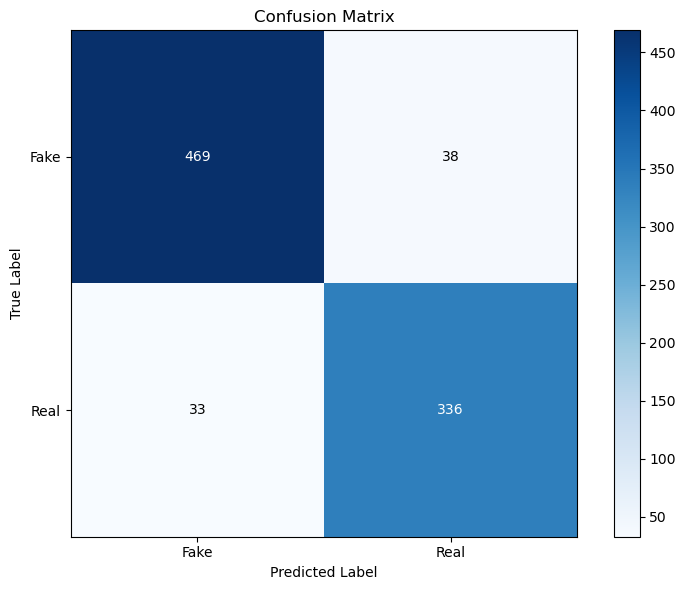

In [12]:
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate precision and recall
precision = precision_score(Y_test, Y_pred)

recall = recall_score(Y_test, Y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Calculate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Fake', 'Real']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label
plt.ylabel('True Label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [13]:
### Naive Bayes Classifier

import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

In [14]:
# Read the CSV file
nr=5000
df = pd.read_csv('train.csv',nrows=nr)

In [15]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)
# Drop rows with missing values
df.dropna(inplace=True)

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:\n", duplicate_rows)
# Drop duplicate rows
df.drop_duplicates(inplace=True)

Missing Values:
 id          0
title     142
author    478
text       11
label       0
dtype: int64
Duplicate Rows:
 Empty DataFrame
Columns: [id, title, author, text, label]
Index: []


In [16]:
# Define a function to clean and preprocess text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove non-alphanumeric characters and URLs
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'http\S+', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    return tokens

# Apply cleaning and preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

In [30]:
import nltk
nltk.download('punkt')
import math
from collections import defaultdict

class NaiveBayesClassifier:
    def __init__(self):
        self.class_probs = defaultdict(float)
        self.word_probs = defaultdict(lambda: defaultdict(float))

    def train(self, X_train, y_train):
        total_docs = len(y_train)
        class_counts = defaultdict(int)
        word_counts = defaultdict(lambda: defaultdict(int))

        # Calculate class probabilities and word frequencies
        for i in range(total_docs):
            class_label = y_train.iloc[i]
            class_counts[class_label] += 1

            for word in X_train.iloc[i]:
                word_counts[class_label][word] += 1

        # Calculate class probabilities
        for class_label, count in class_counts.items():
            self.class_probs[class_label] = count / total_docs

        # Calculate word probabilities
        for class_label, word_freqs in word_counts.items():
            total_words = sum(word_freqs.values())
            for word, freq in word_freqs.items():
                self.word_probs[class_label][word] = freq / total_words

    def predict(self, X_test):
        y_pred = []
        for doc in X_test:
            scores = defaultdict(float)

            # Calculate log probabilities
            for class_label, class_prob in self.class_probs.items():
                scores[class_label] += math.log(class_prob)

                for word in doc:
                    scores[class_label] += math.log(self.word_probs[class_label].get(word, 1e-10))

            # Predict the class with the highest score
            predicted_class = max(scores, key=scores.get)
            y_pred.append(predicted_class)

        return y_pred

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
# Initialize and train the classifier
nb_classifier = NaiveBayesClassifier()
nb_classifier.train(X_train, y_train)

In [20]:
# Make predictions
y_pred = nb_classifier.predict(X_test)

In [21]:
# Evaluate the classifier
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)

Accuracy: 0.8972602739726028


In [32]:
# Take user input for a news article
user_input = input("Enter the news article text: ")

# Clean and preprocess the user input
cleaned_input = clean_text(user_input)

# Convert the cleaned input into a DataFrame format similar to the training data
user_df = pd.DataFrame({'cleaned_text': [cleaned_input]})

# Make predictions using the trained Naive Bayes classifier
user_predictions = nb_classifier.predict(user_df['cleaned_text'])

if(user_predictions[0]==0):
    print('The news is fake')
else:
    print('The news is real')
    

Enter the news article text:  India won the world cup 2 times


The news is real


Precision: 0.901649277394644
Recall: 0.8972602739726028


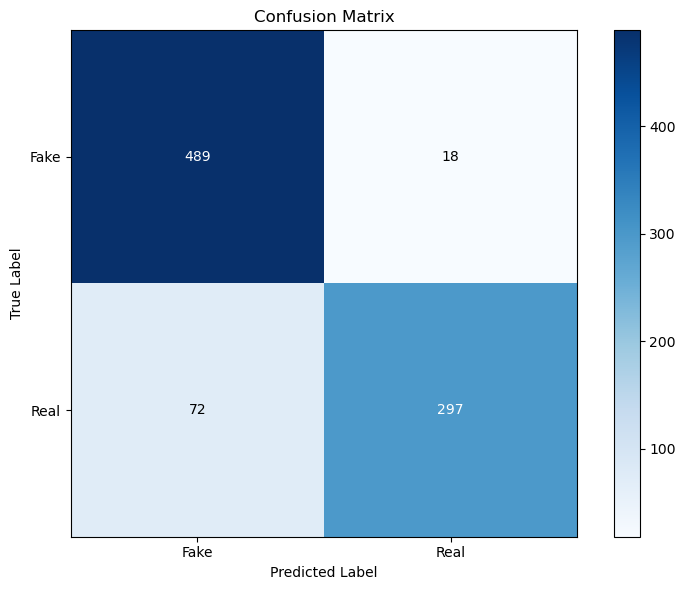

In [23]:
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Fake', 'Real']  # Assuming 'Fake' is class 0 and 'Real' is class 1
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Scores')

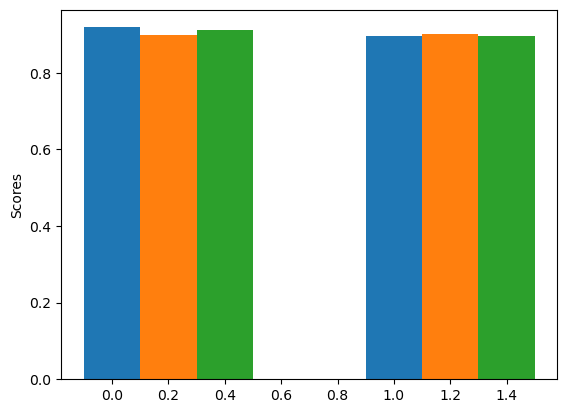

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate metrics for Logistic Regression
lr_accuracy = accuracy_score(Y_test, Y_pred)
lr_precision = precision_score(Y_test, Y_pred)
lr_recall = recall_score(Y_test, Y_pred)

# Calculate metrics for Naive Bayes Classifier
nb_accuracy = accuracy
# Assuming y_pred is the predicted labels from Naive Bayes
nb_precision = precision_score(y_test, y_pred, average='weighted')
nb_recall = recall_score(y_test, y_pred, average='weighted')

# Plotting the comparative graph
labels = ['Logistic Regression', 'Naive Bayes Classifier']
accuracies = [lr_accuracy, nb_accuracy]
precisions = [lr_precision, nb_precision]
recalls = [lr_recall, nb_recall]

x = range(len(labels))

fig, ax = plt.subplots()
ax.bar(x, accuracies, width=0.2, label='Accuracy')
ax.bar([pos + 0.2 for pos in x], precisions, width=0.2, label='Precision')
ax.bar([pos + 0.4 for pos in x], recalls, width=0.2, label='Recall')

ax.set_ylabel('Scores')

<Figure size 640x480 with 0 Axes>

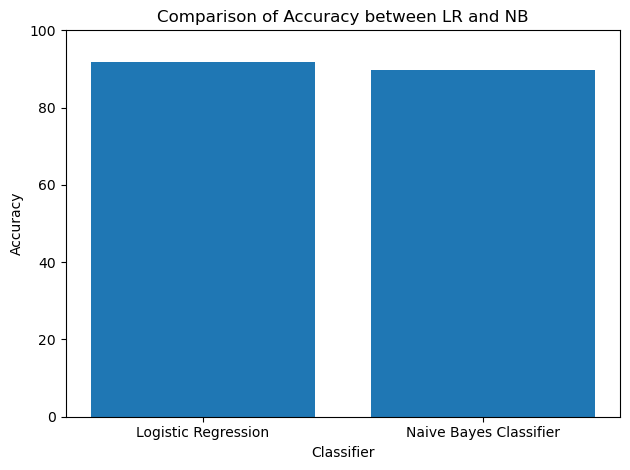

In [25]:
ax.set_title('Comparison of LR vs NB Metrics')
ax.set_xticks([pos + 0.2 for pos in x])
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt

# Assuming you have calculated accuracy for both models
accuracy_lr = 91.89  # Example accuracy for Logistic Regression
accuracy_nb = 89.72  # Example accuracy for Naive Bayes Classifier

# Plotting the comparative graph
labels = ['Logistic Regression', 'Naive Bayes Classifier']
accuracies = [accuracy_lr, accuracy_nb]

x = range(len(labels))

plt.bar(x, accuracies)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy between LR and NB')
plt.xticks(x, labels)
plt.ylim(0, 100)  # Set the y-axis limit to 0-100 for percentage accuracy

plt.tight_layout()
plt.show()